In [19]:
# convolution example
import tensorflow as tf
import numpy as np

# image의 형태
# 1장의 이미지는 3차원형태의 데이터
# (이미지의 개수, width, height, color)
# (1,3,3,1)

image = np.array([[[[1],[2],[3]],
                  [[4],[5],[6]],
                  [[7],[8],[9]]]], dtype = np.float32)
print(image.shape)

# 필터를 준비해야 되요
# (width, height, color, 필터의 개수)
# (2,2,1,3) # 필터를 3개쓴겈 
weight = np.array([[[[1,-5,10]],
                   [[1,-5,10]]],
                  [[[1,-5,10]],
                   [[1,-5,10]]]])
print(weight.shape)
print(weight)

# ms = np.array([[1],[2]])
# print(ms.shape)
# print(ms)

# strdie 지정(사실 2차원이면 되는데 행렬연산때문에)
# (1, stride width, stride height, 1) 4차원으로 표현 // 맨앞과 맨뒤의 1은 의미없어요 dummy에요! // 위로한픽셀 아래로 햔 픽셀 움직일거에요
# stride = [1,1,1,1]
conv2d = tf.nn.conv2d(image,weight, strides=[1,1,1,1], padding = "VALID") # 한칸씩 이동하는 strides를 이용할거고

print(conv2d.shape)

(1, 3, 3, 1)
(2, 2, 1, 3)
[[[[ 1 -5 10]]

  [[ 1 -5 10]]]


 [[[ 1 -5 10]]

  [[ 1 -5 10]]]]
(1, 2, 2, 3)


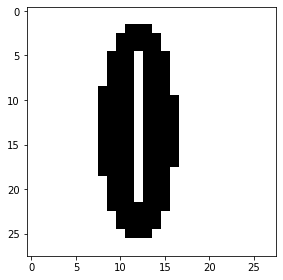

(28, 28)
Extracting ./data/mnist\train-images-idx3-ubyte.gz
Extracting ./data/mnist\train-labels-idx1-ubyte.gz
Extracting ./data/mnist\t10k-images-idx3-ubyte.gz
Extracting ./data/mnist\t10k-labels-idx1-ubyte.gz
(784,)
(28, 28)


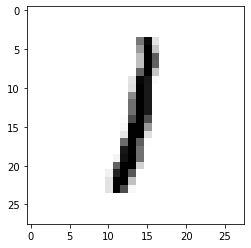

(1, 14, 14, 5)
(5, 14, 14, 1)


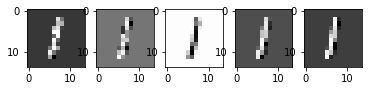

In [60]:
## MNIST 예제를 이용해서 하나의 이미지에 대한
## convolutional image 5개를 생성해 보아요!
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from skimage import data, io, filters

img2 = io.imread("./data/number/0_2c.png") # bmp
io.imshow(img2)
plt.show()
img2
print(img2.shape)

# # ... or any other NumPy array!
# edges = filters.sobel(img)
# io.imshow(edges)
# io.show()


# Data Loading
mnist = input_data.read_data_sets("./data/mnist", one_hot=True)

# training 이미지 중 2번째 이미지의 정보를 얻어와요!
img = mnist.train.images[4]
print(img.shape) # (784,) 1차원 배열로 만들어놨구만 ? 

img = img.reshape(28,-1)
print(img.shape)
plt.imshow(img, cmap="Greys", interpolation="nearest")
plt.show()

# 해당 이미지를 convolution 이미지로 변형
# 2차원 형태의 img를 4차원 형태의 img로 변환
img = img.reshape(-1,28,28,1) # (이미지의 개수, width, height, color) // (1,28,28,1)
# 이미지가 준비되어있으니 필터를 준비
# 5개의 필터를 이용, 2x2짜리 필터를 이용
# (2,2,1,5)
W = tf.Variable(tf.random_normal([2,2,1,5]), name="filter")
conv2d = tf.nn.conv2d(img,W,strides=[1,2,2,1], padding="SAME")
print(conv2d.shape)

# (1, 14, 14, 5) => 14x14짜리 이미지가 5개 생성@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
# 새로 생성된 이미지를 plt를 이용해서 확인

sess=tf.Session()
sess.run(tf.global_variables_initializer())
conv2d = sess.run(conv2d) # conv2d는 실제배열이고 , sess.run(conv2d)는 탠서가되겟죠 ?

# 배열의 축을 임의로 변경
# (1, 14, 14, 5) => (5, 14, 14, 1)
conv2d = np.swapaxes(conv2d,0,3) # 축을 변경시키는 함수 conv2d의 0번째와 3번째를 스위치해라!! (1,14,14,5)에서 1과 5의 위치를 바까라@@@@@@@@
print(conv2d.shape)
fig,axes = plt.subplots(1,5) # 1행 5열짜리 subplot을 생성 
                            # axes
for idx,item in enumerate(conv2d):
    axes[idx].imshow(item.reshape(14,14),cmap="Greys")
plt.show()

In [75]:
%%time
#### NMIST with CNN
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf

## 0. 그래프 초기화
tf.reset_default_graph()

## 1. Data Loading & Data 정제
mnist = input_data.read_data_sets("./data/mnist",one_hot=True)


## 2. Placeholder 설정
X = tf.placeholder(shape=[None,784], dtype=tf.float32)
Y = tf.placeholder(shape=[None,10], dtype=tf.float32)
drop_rate = tf.placeholder(dtype=tf.float32)

## 3.Convolution
## 3.1 Convolution layer 1
x_img = tf.reshape(X,[-1,28,28,1]) # 칼라에대한 depth가 맨 마지막에 붙어요 (1)
W1 = tf.Variable(tf.random_normal([2,2,1,32]), name="filter1")
L1 = tf.nn.conv2d(x_img, W1, strides=[1,2,2,1],padding = "SAME") # layer가 여러개있을수 있는데 첫번째 계층이란 얘기에요
print(L1.shape)
L1 = tf.nn.relu(L1)
L1 = tf.nn.max_pool(L1,ksize=[1,2,2,1], strides=[1,2,2,1], padding="SAME")
print(L1.shape) # (?, 7, 7, 32) 원래 28x28 1장짜리가 7x7  짜리 32장으로 바뀜@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ 렐루작업 멕스풀작업
# [-1,28,28,1] 초기엔이랫는데
# (?, 7, 7, 32) 이래짐

## 3.2 Convolution layer 2
                                         # 이미 흐릿해진 데이터를 가지고 한번더 컨벌루젼하니까 더 흐릿해지겟죠
W2 = tf.Variable(tf.random_normal([3,3,32,64]), name="filter2") # 크기가 3이고 3x3이고 (앞에 두개는 : 두번째 컨벌류전 필터의 사이즈, 세번재꺼는 위에서 맨마지막 (색깔의 갯수 인듯))

L2 = tf.nn.conv2d(L1, W2, strides=[1,1,1,1],padding = "SAME") # layer가 여러개있을수 있는데 첫번째 계층이란 얘기에요
print(L2.shape)
L2 = tf.nn.relu(L2)
print("==")
print(L2.shape)

L2=tf.reshape(L2,[-1,7*7*64])

## 4.Neural Network
## 4.1 Weight & bias
W3 = tf.get_variable("weight3", shape=[7*7*64,256],initializer=tf.contrib.layers.xavier_initializer()) # 앞에꺼는 입력되는 컬럼의수or 이미지의수, 뒤에꺼가 뒤로 넘어갈 갯수 ? // 컬럼수, 아웃풋 수



Extracting ./data/mnist\train-images-idx3-ubyte.gz
Extracting ./data/mnist\train-labels-idx1-ubyte.gz
Extracting ./data/mnist\t10k-images-idx3-ubyte.gz
Extracting ./data/mnist\t10k-labels-idx1-ubyte.gz
(?, 14, 14, 32)
(?, 7, 7, 32)
(?, 7, 7, 64)
==
(?, 7, 7, 64)
Wall time: 890 ms


In [ ]:
%%time
# MNIST with CNN
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf

# graph initialization
tf.reset_default_graph()

# 1. Data Loading & Refining
mnist = input_data.read_data_sets("./data/mnist", one_hot=True)

# 2. Placeholder 설정
X = tf.placeholder(shape=[None,784], dtype=tf.float32)
Y = tf.placeholder(shape=[None,10], dtype=tf.float32)
drop_rate = tf.placeholder(dtype=tf.float32)

# 3. Convolution
# 3.1 Conv. layer 01
x_img = tf.reshape(X, [-1,28,28,1])
W1 = tf.Variable(tf.random_normal(shape=[2,2,1,32]), name="filter1")
L1 = tf.nn.conv2d(x_img, W1, strides=[1,2,2,1], padding="SAME")
L1 = tf.nn.relu(L1)
L1 = tf.nn.max_pool(L1, ksize=[1,2,2,1], strides= [1,2,2,1], padding = "SAME")

# 3.2 Conv. layer 02
W2 = tf.Variable(tf.random_normal(shape=[3,3,32,64]), name="filter2")
L2 = tf.nn.conv2d(L1, W2, strides = [1,1,1,1], padding = "SAME")
L2 = tf.nn.relu(L2)

# 4. Neural Network
# 4.1 Weight & Bias, Reshaping L2 to 2D matrix

L2 = tf.reshape(L2, [-1, 7*7*64])
W3 = tf.get_variable("weight", shape=[7*7*64,10], initializer=tf.contrib.layers.xavier_initializer())
b = tf.Variable(tf.random_normal(shape= [10]), name="bias")

logits = tf.matmul(L2,W3)+b
H = tf.nn.relu(logits)
print(H.shape)
# cost function
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = logits, labels = Y))

# train node 생성
train = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)

# session 객체 생성 & 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# epoch(에폭): training data를 1번 학습 시키는 것
training_epoch = 30
batch_size = 5000


# batch size & epoch 활용한 학습법
for step in range(training_epoch):
    num_of_iter = int(mnist.train.num_examples / batch_size)
    cost_val = 0
    for i in range(num_of_iter):
        batch_x, batch_y = mnist.train.next_batch(batch_size = batch_size)
        _, cost_val = sess.run([train, cost], feed_dict={X:batch_x, Y: batch_y, drop_rate: 0})
    if step%100 == 0:
        print(cost_val)
        
# Accuracy 측정
predict = tf.argmax(H, 1)
correct = tf.equal(predict, tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))

result = sess.run(accuracy, feed_dict={X: mnist.train.images, Y: mnist.train.labels, drop_rate:0})
print("Accuracy: {}".format(result))

Extracting ./data/mnist\train-images-idx3-ubyte.gz
Extracting ./data/mnist\train-labels-idx1-ubyte.gz
Extracting ./data/mnist\t10k-images-idx3-ubyte.gz
Extracting ./data/mnist\t10k-labels-idx1-ubyte.gz
(?, 10)


In [77]:
%%time
# MNIST with CNN
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf

# graph initialization
tf.reset_default_graph()

# 1. Data Loading & Refining
mnist = input_data.read_data_sets("./data/mnist", one_hot=True)

# 2. Placeholder 설정
X = tf.placeholder(shape=[None,784], dtype=tf.float32)
Y = tf.placeholder(shape=[None,10], dtype=tf.float32)
drop_rate = tf.placeholder(dtype=tf.float32)

# 3. Convolution
# 3.1 Conv. layer 01
x_img = tf.reshape(X, [-1,28,28,1])
W1 = tf.Variable(tf.random_normal(shape=[2,2,1,8]), name="filter1")
L1 = tf.nn.conv2d(x_img, W1, strides=[1,2,2,1], padding="SAME")
L1 = tf.nn.relu(L1)
L1 = tf.nn.max_pool(L1, ksize=[1,2,2,1], strides= [1,2,2,1], padding = "SAME")

# 3.2 Conv. layer 02
W2 = tf.Variable(tf.random_normal(shape=[3,3,8,16]), name="filter2")
L2 = tf.nn.conv2d(L1, W2, strides = [1,1,1,1], padding = "SAME")
L2 = tf.nn.relu(L2)

# 4. Neural Network
# 4.1 Weight & Bias, Reshaping L2 to 2D matrix

L2 = tf.reshape(L2, [-1, 7*7*16])
W3 = tf.get_variable("weight", shape=[7*7*16,10], initializer=tf.contrib.layers.xavier_initializer())
b = tf.Variable(tf.random_normal(shape= [10]), name="bias")

logits = tf.matmul(L2,W3)+b
H = tf.nn.relu(logits)
print(H.shape)
# cost function
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = logits, labels = Y))

# train node 생성
train = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)

# session 객체 생성 & 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# epoch(에폭): training data를 1번 학습 시키는 것
training_epoch = 15
batch_size = 500


# batch size & epoch 활용한 학습법
for step in range(training_epoch):
    num_of_iter = int(mnist.train.num_examples / batch_size)
    cost_val = 0
    for i in range(num_of_iter):
        batch_x, batch_y = mnist.train.next_batch(batch_size = batch_size)
        _, cost_val = sess.run([train, cost], feed_dict={X:batch_x, Y: batch_y, drop_rate: 0})
    if step%100 == 0:
        print(cost_val)
        
# Accuracy 측정
predict = tf.argmax(H, 1)
correct = tf.equal(predict, tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))

result = sess.run(accuracy, feed_dict={X: mnist.train.images, Y: mnist.train.labels, drop_rate:0})
print("Accuracy: {}".format(result))

Extracting ./data/mnist\train-images-idx3-ubyte.gz
Extracting ./data/mnist\train-labels-idx1-ubyte.gz
Extracting ./data/mnist\t10k-images-idx3-ubyte.gz
Extracting ./data/mnist\t10k-labels-idx1-ubyte.gz
(?, 10)
0.4362086
Accuracy: 0.9646909236907959
Wall time: 11min 54s
Parser   : 216 ms


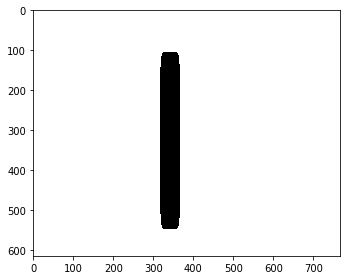

(614, 768)
(614, 768)
(28, 28)


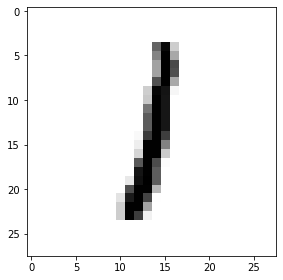

In [76]:
## 돈돈 작품

from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from skimage import data, io, filters

img2 = io.imread("./data/number/dd2.png") # bmp
io.imshow(img2)
plt.show()
img2
print(img2.shape)
print(img2.shape) # (784,) 1차원 배열로 만들어놨구만 ? 

img = img.reshape(28,-1)  
img = 1-img
print(img.shape)
io.imshow(img)
plt.show()